## PART A
During the work on this assignement, AI tools Gemini, ChatGPT, Github - Copilot and Grammarly were used when writing the code and the texts. All of the outputs were checked and modified accordingly.

In [41]:
import Pkg

using DrWatson

@quickactivate 



Pkg.status()

include(srcdir("PartA_code.jl"))




Status `C:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Assignment1\Project.toml`
  [6d3278bc] ARCHModels v2.6.1
  [336ed68f] CSV v0.10.15
  [5d742f6a] CSVFiles v1.0.2
  [a93c6f00] DataFrames v1.8.1
  [31c24e10] Distributions v0.25.122
  [634d3b9d] DrWatson v2.19.1
  [587475ba] Flux v0.16.5
  [95c0ec29] ForecastPlots v0.1.0
  [f6369f11] ForwardDiff v1.2.2
  [7073ff75] IJulia v1.31.1
  [945b72a4] MarketData v0.15.0
  [429524aa] Optim v1.13.2
  [91a5bcdd] Plots v1.41.1
  [b0e4dd01] RollingFunctions v0.8.1
  [10745b16] Statistics v1.11.1
  [2913bbd2] StatsBase v0.34.7
  [f3b207a7] StatsPlots v0.15.8
⌅ [9e3dc215] TimeSeries v0.24.2
  [e4b3b0a2] YFinance v0.1.10
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`
Status `C:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Assignment1\Project.toml`
  [6d3278bc] ARCHModels v2.6.1
  [336ed68f] CSV v0.10.15
  [5d742f6a] CSV

┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches C:\Users\jachy\.julia\packages\LineSearches\b4CwT\src\hagerzhang.jl:156
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches C:\Users\jachy\.julia\packages\LineSearches\b4CwT\src\hagerzhang.jl:156
┌ Warning: Chyba fitování v kroku 30: BoundsError(-0.003433280494009882, 2)
└ @ Main c:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Assignment1\src\PartA_code.jl:293
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches C:\Users\jachy\.julia\packages\LineSearches\b4CwT\src\hagerzhang.jl:156
┌ Warning: Chyba fitování v kroku 31: BoundsError(-0.005704476556782222, 2)
└ @ Main c:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Assignment1\src\PartA_code.jl:293
┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches C:\Users\jachy\.julia\packages\LineSearches\b4CwT\src\hagerzhang.j

"Part A code executed successfully."

#### 2) - 3)

We chose the company Ventyx Biosciences with a ticker VTYX.

We downloaded daily close price data from 21st October 2021 to 7th of January 2025.

On the table below we can asses the basic summary statistics of our data.


The minimum returns are much greater than the maximum returns, which is quite common for financial data.

What we find interesting, though, is the kurtosis level, which is abnormally high, indicating significant clustering around the mean and heavier tails (essentially, the few extreme outliers of losses and gains). This is clearly observed in the histogram below, which compares our log-returns distribution with the normal one. 



In [42]:
display(summary_table)

Row,Statistics,Value
,String,Real
1,Min,-1.64116
2,N,806.0
3,Median,-0.0033
4,Skewness,-8.2923
5,Kurtosis,173.373
6,Mean,-0.0026
7,Std Dev,0.0855
8,Max,0.5221


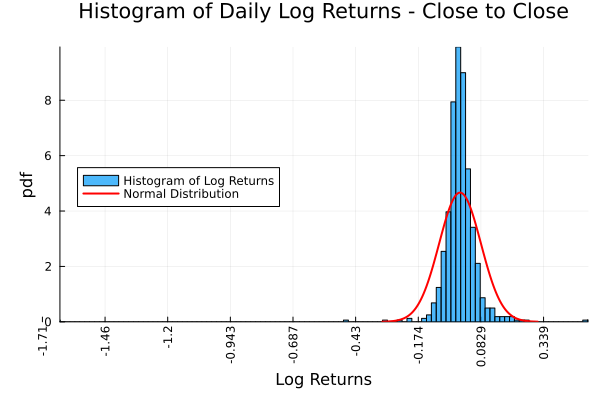

In [43]:
display(hist)

#### 3)

Below, we plotted the log returns to observe the behaviour of our data.

We may conclude that most of the jumps have no long-lasting effects on the following log-returns.

It is also clear that the returns are mostly minimal throughout the time series.

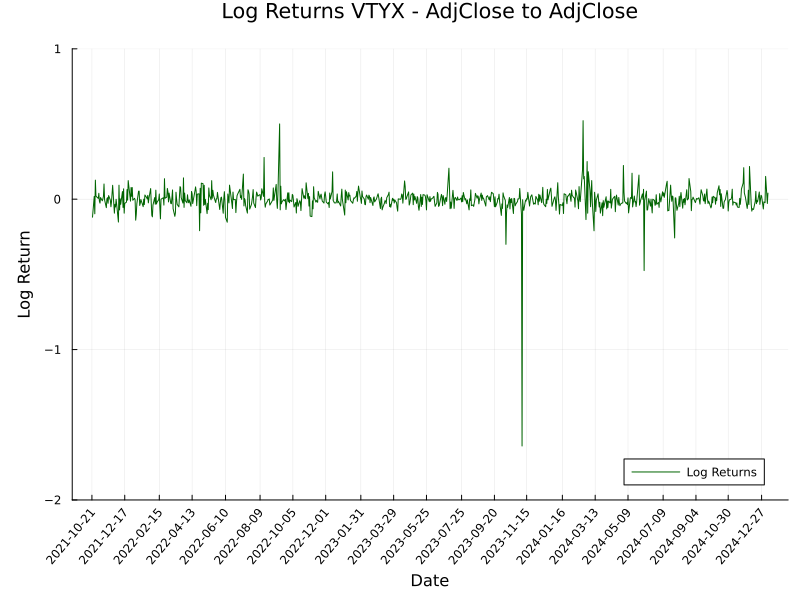

In [44]:
display(p_ret)

We went further and modelled weekly volatility. The method we chose is to calculate the standard deviation of the log-returns for the last five days. Hence, we observe greater consistency in volatility, as the effect of greater deviation persists for at least 5 days. Still, however, what is interesting is the limited effect of great volatility on the future volatility. This might be caused by the low liquidity of the market, as the significant deviations are driven by a few traders who sell or buy in large quantities. As the trade magnitude then decreases, the volatility of log-returns also diminishes. 

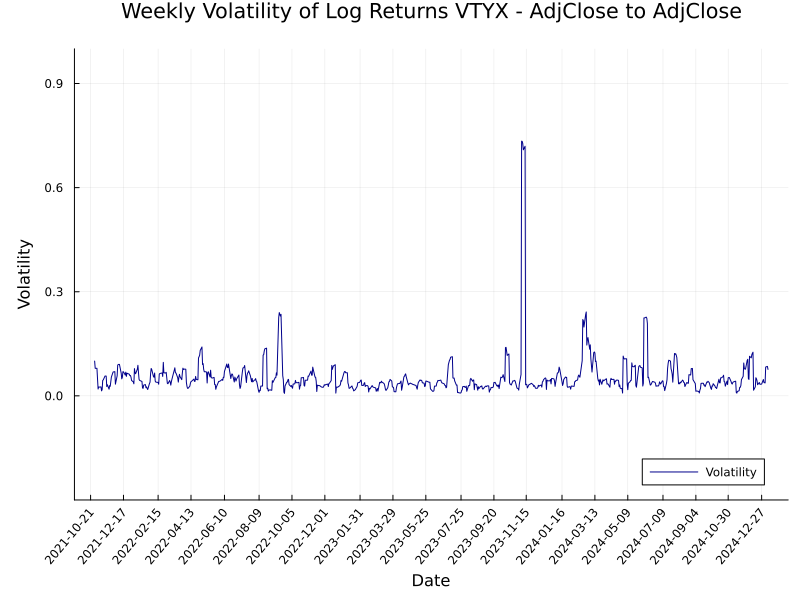

In [45]:
display(p_vol)

#### 4)

As we should model our data using either ARCH or GARCH, we plot the ACF and PACF to determine which ARIMA model to fit.

Since we observe no autocorrelation nor partial correlation at a 95% confidence level, we cannot fit any ARIMA model.

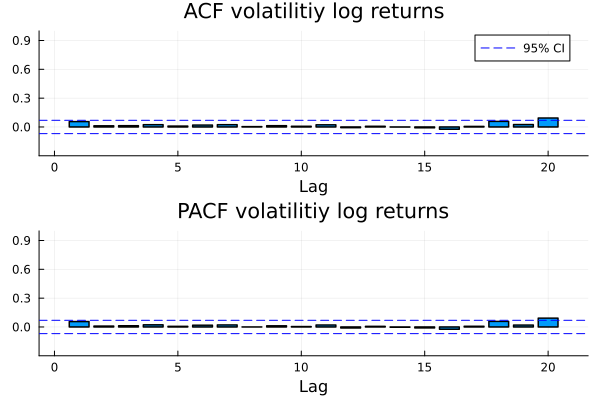

In [46]:
plot(acf_plot, pacf_plot, layout = (2, 1))

To confirm our suspicion of no ARCH effects, we conduct the ARCH LM test. We have done it for several lags; however, none of them could reject the H0 hypothesis of no ARCH effects. The results of the test for lag one are presented below.

In [47]:
ARCHLMTest_results

ARCH LM test for conditional heteroskedasticity
-----------------------------------------------
Population details:
    parameter of interest:   T⋅R² in auxiliary regression
    value under h_0:         0
    point estimate:          0.00171797

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.9669

Details:
    sample size:                    806
    number of lags:                 1
    LM statistic:                   0.00171797


#### 5)

Still, we ought to fit and forecast the ARCH/GARCH model; hence, we chose GARCH(1,1) with a rolling 30-day forecast to estimate our data.

Below, we compare the mean and volatility 1-day-ahead predictions of our model.


As expected, the results are unfavourable, as the model is not a good fit for these types of data structures.

Probably modelling these data through RV-HAR might give us more favourable results.

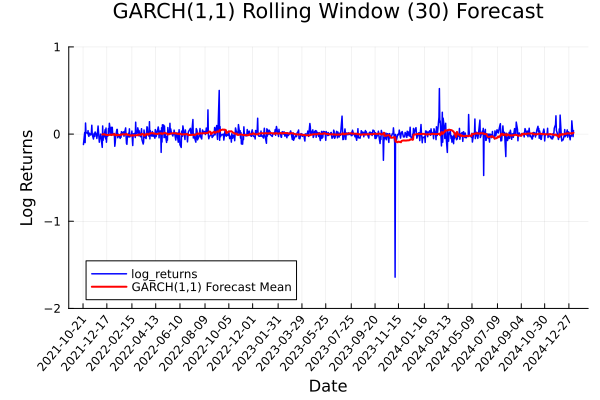

In [48]:
display(Forecast_mean)

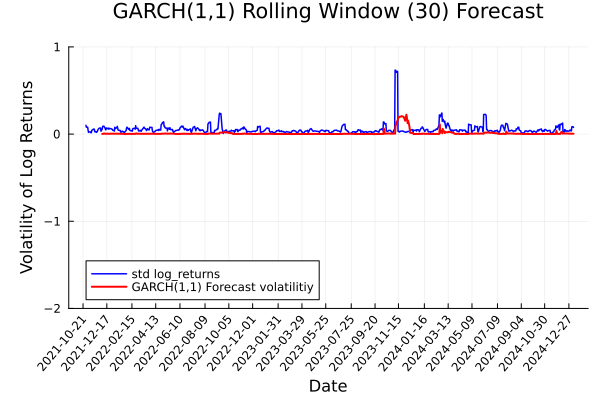

In [49]:
display(Forecast_volatility)